### Задание:

1. Применить для тестовых вариантов и вариантов из репозиториев различные алгоритмы поиска ассоциативных правил при одинаковых начальных условиях (при одинаковых пороговых значениях для поддержки и достоверности) и сравнить полученные результаты. Для тестовых вариантов выполнить ручные расчеты (например, с применением MS Excel) и расчеты с применением программных библиотек на языке Python. Для вариантов из репозиториев выполнить расчеты с применением программных библиотек на языке Python. В качестве алгоритмов поиска ассоциативных правил использовать алгоритмы:
- Apriori (https://pypi.org/project/apriori-python/),
- Efficient Apriori (https://pypi.org/project/efficient-apriori/),
- FPGrowth (https://pypi.org/project/fpgrowth-py/).

2. Сформировать базы ассоциативных правил с уровнем минимальной достоверности 60% и 80%. Вычислить для ассоциативных правил поддержку, достоверность, значимость.

3. Оценить время формирования искомых ассоциативных правил с применением различных алгоритмов и построить диаграммы, позволяющие выполнить сравнительный анализ.

4. Выполнить визуализацию ассоциативных правил (https://pypi.org/project/pyarmviz/).

In [206]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from apriori_python import apriori
from efficient_apriori import apriori as eff_apriori
from fpgrowth_py import fpgrowth
from PyARMViz import PyARMViz

###  Расчеты с применением программных библиотек на языке Python для тестового варианта (2 - Аптека)

In [207]:
MINSUP = 0.3
MINCONF = 0.6

# Parse normalized data from .csv into transaction list
def csv_to_transactions(path):
    df = pd.read_csv(path, sep=';')
    transactions = []
    for index, row in df.iterrows():
        transaction = [item for item in df.columns if row[item] == 1]
        transactions.append(transaction)
    return transactions

transactions = csv_to_transactions('data/pharmacy20-custom.csv')

In [208]:
freqItemSet, rules = apriori(transactions, minSup=MINSUP, minConf=MINCONF)
rules

[[{'Арбидол'}, {'Граммидин'}, 0.6428571428571429],
 [{'Граммидин'}, {'Арбидол'}, 0.6428571428571429],
 [{'Хлоргексидин'}, {'Арбидол'}, 0.7],
 [{'Хлоргексидин'}, {'Граммидин'}, 0.8],
 [{'Мирамистин'}, {'Арбидол'}, 1.0]]

In [209]:
freqItemSet, rules = eff_apriori(transactions, min_support=MINSUP, min_confidence=MINCONF)
for rule in rules:
    print(rule)

{Граммидин} -> {Арбидол} (conf: 0.643, supp: 0.450, lift: 0.918, conv: 0.840)
{Арбидол} -> {Граммидин} (conf: 0.643, supp: 0.450, lift: 0.918, conv: 0.840)
{Мирамистин} -> {Арбидол} (conf: 1.000, supp: 0.350, lift: 1.429, conv: 300000000.000)
{Хлоргексидин} -> {Арбидол} (conf: 0.700, supp: 0.350, lift: 1.000, conv: 1.000)
{Хлоргексидин} -> {Граммидин} (conf: 0.800, supp: 0.400, lift: 1.143, conv: 1.500)


In [210]:
freqItemSet, rules = fpgrowth(transactions, minSupRatio=MINSUP, minConf=MINCONF)
rules

[[{'Мирамистин'}, {'Арбидол'}, 1.0],
 [{'Хлоргексидин'}, {'Арбидол'}, 0.7],
 [{'Хлоргексидин'}, {'Граммидин'}, 0.8],
 [{'Арбидол'}, {'Граммидин'}, 0.6428571428571429],
 [{'Граммидин'}, {'Арбидол'}, 0.6428571428571429]]

###  Расчеты для варианта из репозитория (2 - BreadBasket_DMS.csv)

In [211]:
raw_df = pd.read_csv('data/BreadBasket_DMS.csv')

def cleanup_dataset(df):
    # Returns new dataset without NONE values in specified c
    df_none_entries = df.loc[df['Item']=='NONE',:]
    return df.drop(df_none_entries.index)

df = cleanup_dataset(raw_df)

df = df[['Transaction', 'Item']].drop_duplicates()

In [212]:
# Convert dataset to transaction list
transactions = list()
current_transaction = list()
ta_number = 1

for index, row in df.iterrows():
    ta, i = row['Transaction'], row['Item']
    if ta != ta_number:
        # Filter transactions with only one element
        if len(current_transaction) > 1:
            transactions.append(current_transaction)
        current_transaction = list()
        ta_number = ta
    current_transaction.append(i)

In [213]:
MINSUP = 0.02
MINCONF = 0.5

# Time elapsed for all algorithms
t = dict()

In [214]:
start = time.perf_counter()
freqItemSet, rules = apriori(transactions, minSup=MINSUP, minConf=MINCONF)
t['apriori_py'] = time.perf_counter() - start
rules

[[{'Soup'}, {'Coffee'}, 0.5244755244755245],
 [{'Brownie'}, {'Coffee'}, 0.5391304347826087],
 [{'Muffin'}, {'Coffee'}, 0.5493827160493827],
 [{'Scone'}, {'Coffee'}, 0.5643564356435643],
 [{'Juice'}, {'Coffee'}, 0.5652173913043478],
 [{'Cookies'}, {'Coffee'}, 0.5680851063829787],
 [{'Hot chocolate'}, {'Coffee'}, 0.5797101449275363],
 [{'Alfajores'}, {'Coffee'}, 0.5830721003134797],
 [{'Cake'}, {'Coffee'}, 0.5859728506787331],
 [{'Sandwich'}, {'Coffee'}, 0.5905383360522023],
 [{'Pastry'}, {'Coffee'}, 0.6],
 [{'Medialuna'}, {'Coffee'}, 0.6306818181818182],
 [{'Toast'}, {'Coffee'}, 0.7368421052631579]]

In [215]:
start = time.perf_counter()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=MINSUP, minConf=MINCONF)
t['fpgrowth'] = time.perf_counter() - start
rules

[[{'Soup'}, {'Coffee'}, 0.5244755244755245],
 [{'Scone'}, {'Coffee'}, 0.5643564356435643],
 [{'Toast'}, {'Coffee'}, 0.7368421052631579],
 [{'Alfajores'}, {'Coffee'}, 0.5830721003134797],
 [{'Muffin'}, {'Coffee'}, 0.5493827160493827],
 [{'Juice'}, {'Coffee'}, 0.5652173913043478],
 [{'Brownie'}, {'Coffee'}, 0.5391304347826087],
 [{'Cookies'}, {'Coffee'}, 0.5680851063829787],
 [{'Hot chocolate'}, {'Coffee'}, 0.5797101449275363],
 [{'Medialuna'}, {'Coffee'}, 0.6306818181818182],
 [{'Sandwich'}, {'Coffee'}, 0.5905383360522023],
 [{'Pastry'}, {'Coffee'}, 0.6],
 [{'Cake'}, {'Coffee'}, 0.5859728506787331]]

In [216]:
start = time.perf_counter()
freqItemSet, rules = eff_apriori(transactions, min_support=MINSUP, min_confidence=MINCONF)
t['eff_apriori'] = time.perf_counter() - start
for rule in rules:
    print(rule)

{Alfajores} -> {Coffee} (conf: 0.583, supp: 0.034, lift: 0.965, conv: 0.949)
{Brownie} -> {Coffee} (conf: 0.539, supp: 0.034, lift: 0.892, conv: 0.858)
{Cake} -> {Coffee} (conf: 0.586, supp: 0.094, lift: 0.969, conv: 0.955)
{Cookies} -> {Coffee} (conf: 0.568, supp: 0.048, lift: 0.940, conv: 0.916)
{Hot chocolate} -> {Coffee} (conf: 0.580, supp: 0.051, lift: 0.959, conv: 0.941)
{Juice} -> {Coffee} (conf: 0.565, supp: 0.035, lift: 0.935, conv: 0.910)
{Medialuna} -> {Coffee} (conf: 0.631, supp: 0.060, lift: 1.043, conv: 1.071)
{Muffin} -> {Coffee} (conf: 0.549, supp: 0.032, lift: 0.909, conv: 0.878)
{Pastry} -> {Coffee} (conf: 0.600, supp: 0.082, lift: 0.993, conv: 0.989)
{Sandwich} -> {Coffee} (conf: 0.591, supp: 0.066, lift: 0.977, conv: 0.966)
{Scone} -> {Coffee} (conf: 0.564, supp: 0.031, lift: 0.934, conv: 0.908)
{Soup} -> {Coffee} (conf: 0.524, supp: 0.027, lift: 0.868, conv: 0.832)
{Toast} -> {Coffee} (conf: 0.737, supp: 0.041, lift: 1.219, conv: 1.503)


Time elapsed - apriori_py:    	0.3614897 s
Time elapsed - fpgrowth:      	0.1372009 s
Time elapsed - eff_apriori:   	0.0054957 s
Time elapsed graph (s)


<BarContainer object of 3 artists>

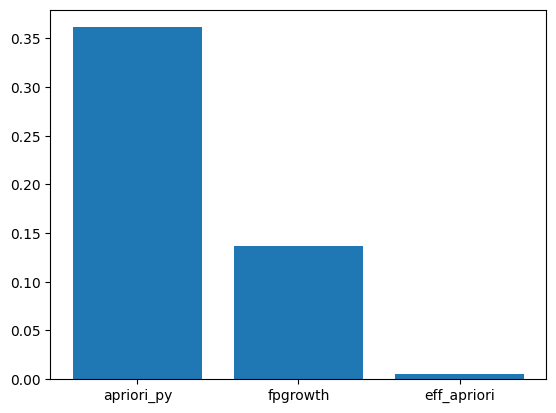

In [217]:
for k, v in t.items():
    text = f"Time elapsed - {k}:"
    print(f"{text}{' '*(30 - len(text))}\t{v:.7f} s")
    
print('Time elapsed graph (s)')
plt.bar(*zip(*t.items()))

Time elapsed graph (s) - Logarithmic scale


<BarContainer object of 3 artists>

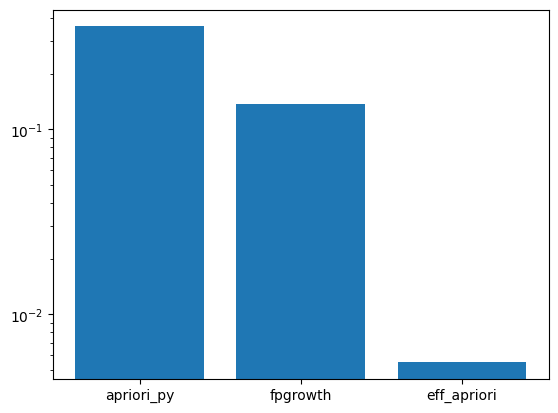

In [218]:
print('Time elapsed graph (s) - Logarithmic scale')
plt.bar(*zip(*t.items()), log=True)

In [229]:
PyARMViz.metadata_scatter_plot(rules)
PyARMViz.adjacency_graph_plotly(rules)